In [1]:
import pandas as pd

# Load metadata file (raw info)
data = pd.read_csv("../data/metadata.csv", nrows=1000)
data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


In [2]:
data.isnull().sum() # Check missing info

data_cleaned = data.dropna(subset=["abstract"])

data_cleaned.to_csv('../data/cleaned_data.csv', index=False)

print("Number of rows remaining:", len(data_cleaned))



Number of rows remaining: 958


In [49]:
cleaned_data = pd.read_csv("../data/cleaned_data.csv")
cleaned_data['publish_time'] = pd.to_datetime(cleaned_data['publish_time'], errors='coerce')

# Visualize evolution of usage of word SARS overtime froom 2003 to 2010
sars_data = cleaned_data[cleaned_data['processed_abstract'].str.contains('SARS', case = False, na = False)]

print(cleaned_data.dtypes)

sars_timeline = sars_data.groupby(sars_data['publish_time'].dt.to_period("Y")).size().reset_index(name='count')
print("\n-------------------------\n")
print(sars_timeline)

sars_timeline['publish_time'] = sars_timeline['publish_time'].dt.to_timestamp()


Unnamed: 0                         int64
title                             object
abstract                          object
publish_time              datetime64[ns]
authors                           object
processed_abstract                object
processed_abstract_str            object
dtype: object

-------------------------

  publish_time  count
0         2003      8
1         2004     16
2         2005     34
3         2006     27
4         2007     16
5         2008     22
6         2009     34
7         2010      4


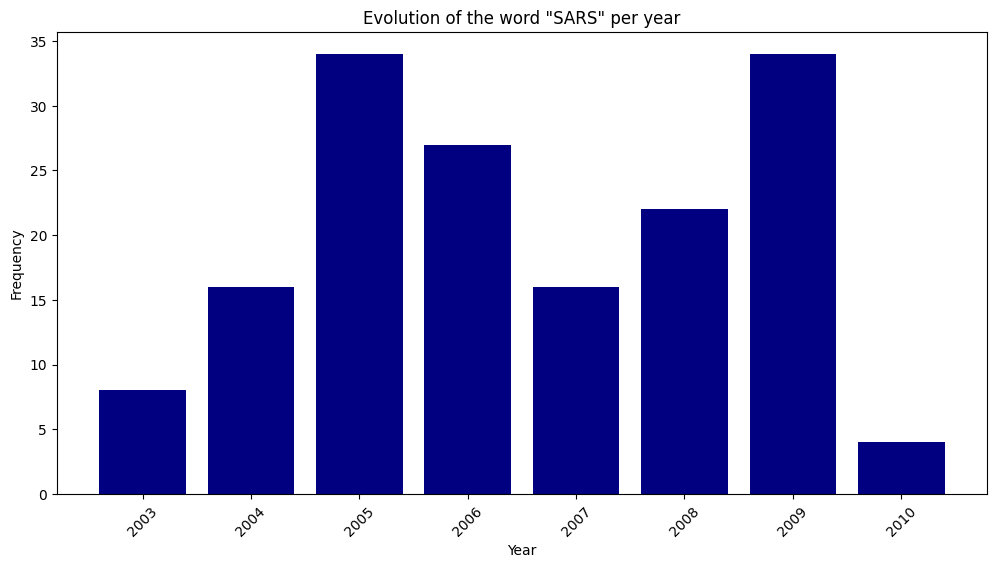

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(sars_timeline['publish_time'].dt.year, sars_timeline['count'], color='navy')
plt.title('Evolution of the word "SARS" per year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(sars_timeline['publish_time'].dt.year, rotation=45) 
plt.show()

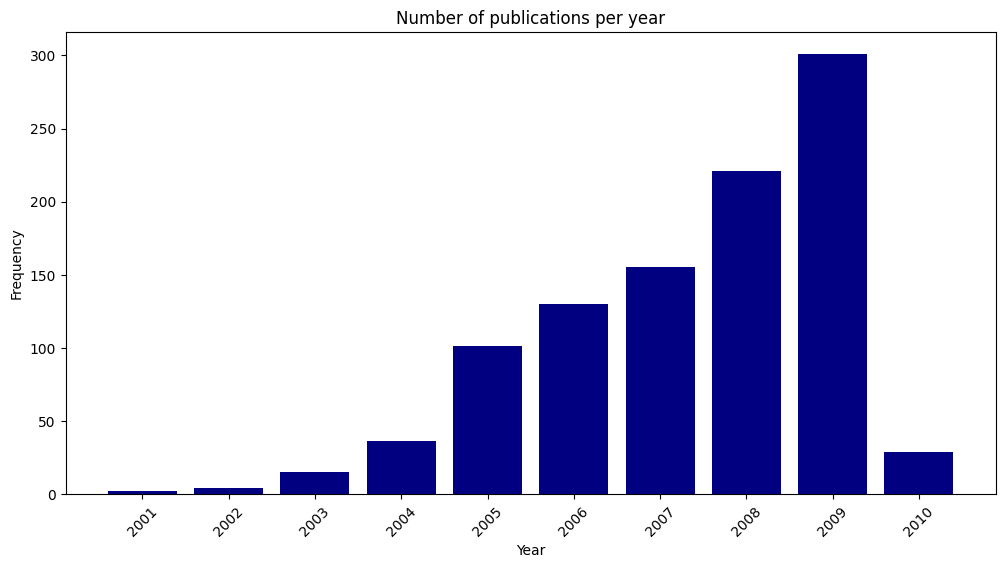

In [69]:
publications_per_year = cleaned_data['publish_time'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(publications_per_year.index, publications_per_year.values, color='navy')
plt.title('Number of publications per year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(publications_per_year.index, rotation=45)
plt.show()